In [269]:
import numpy as np
import pandas as pd

data = pd.read_csv("banknote.csv")
data.head()

,Length,Left,Right,Bottom,Top,Diagonal,Type
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


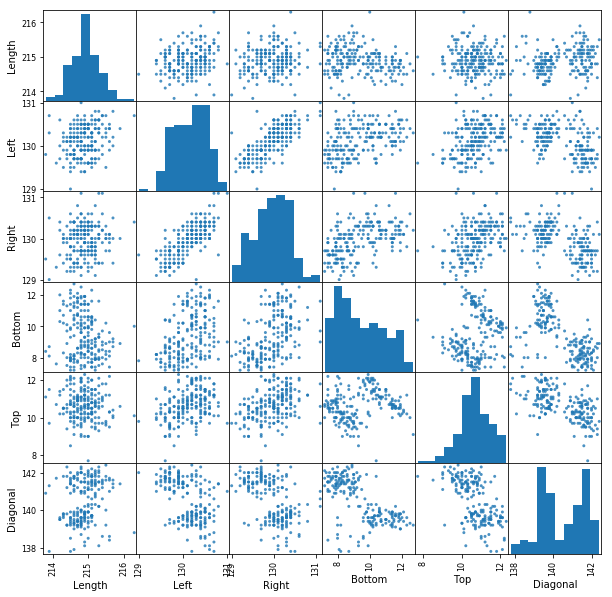

In [270]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from pandas.plotting import scatter_matrix
sm = scatter_matrix(X, alpha=0.8, figsize=(10,10))

In [271]:
# Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.transform(X)

In [272]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2,solver="svd",store_covariance=True)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [273]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0]
 [ 0 10]]


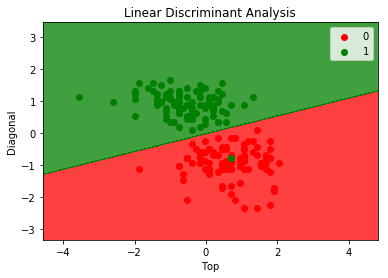

In [274]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = X,y
classifier.fit(X_set[:, 4:6], y_set)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 4].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 5].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 4], X_set[y_set == j, 5], c = ListedColormap(('red','green'))(i),label = j)

plt.title('Linear Discriminant Analysis')
plt.ylabel('Diagonal')
plt.xlabel('Top')
plt.legend()
plt.show()